# Quiz. Доверительные интервалы для оценки среднего

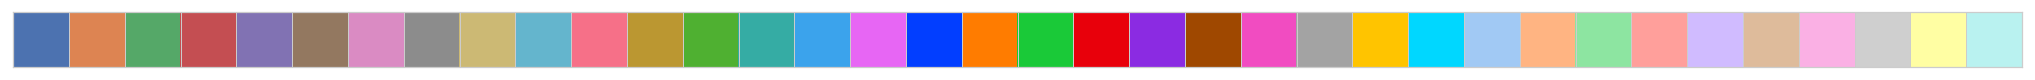

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
from contextlib import contextmanager

sns.set()
sns.set_style("whitegrid")

color_palette = sns.color_palette('deep') + sns.color_palette('husl', 6) + sns.color_palette('bright') + sns.color_palette('pastel')

%matplotlib inline
sns.palplot(color_palette)

def ndprint(a, precision=3):
    with np.printoptions(precision=precision, suppress=True):
        print(a)

## 02. Mortality
Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на миллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

Постройте 95% доверительный интервал для средней годовой смертности в больших городах. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

Нас интересует несмещённая оценка стандартного отклонения. Чтобы не думать всё время о том, правильно ли вычисляется в вашем случае std(), можно всегда использовать std(ddof=1) (ddof — difference in degrees of freedom), тогда нормировка всегда будет на n-1.

In [5]:
data = pd.read_csv('data/02_water.txt', sep='\t')

data.sample(5)

,location,town,mortality,hardness
21,North,Grimsby,1379,94
39,South,Portsmouth,1456,90
37,South,Oxford,1175,107
11,North,Burnley,1755,12
22,North,Halifax,1742,8


In [31]:
sample = data['mortality']
n = len(sample)
df = n - 1

sample_mean = sample.mean()
sample_var = sample.std(ddof=1)

print sample_mean, sample_var

1524.1475409836066 187.6687539314571


In [32]:
from scipy.stats import t

t_int = np.array(t.interval(0.95, df))
t_int

array([-2.00029782,  2.00029782])

In [33]:
t_int * (sample_var / np.sqrt(n))

array([-48.06419963,  48.06419963])

In [36]:
conf_int = sample_mean + t_int * (sample_var / np.sqrt(n))
conf_int

array([1476.08334136, 1572.21174061])

In [37]:
round(conf_int[0], 4)

1476.0833

Все то же самое, что выше, только в одной функции

## 03. South mortality

На данных из предыдущего вопроса постройте 95% доверительный интервал для средней годовой смертности по всем южным городам. Чему равна его верхняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [35]:
def get_conf_interval(sample, conf_alpha=0.95):
    n = len(sample)
    t_int = np.array(t.interval(conf_alpha, n - 1))
    return np.mean(sample) + t_int * (np.std(sample, ddof=1) / np.sqrt(n))

get_conf_interval(sample) == conf_int

array([ True,  True])

In [47]:
south_sample = data['mortality'][data['location'] == 'South']
north_sample = data['mortality'][data['location'] == 'North']

south_conf_int = get_conf_interval(south_sample)
north_conf_int = get_conf_interval(north_sample)

round(south_conf_int[1], 4)

1433.4636

## 04. North mortality

На тех же данных постройте 95% доверительный интервал для средней годовой смертности по всем северным городам. Пересекается ли этот интервал с предыдущим? Как вы думаете, какой из этого можно сделать вывод?

In [48]:
print 'south: ', south_conf_int
print 'north: ', north_conf_int

south:  [1320.15174629 1433.46363832]
north:  [1586.5605252 1680.6394748]


## 05. Water hardness

Пересекаются ли 95% доверительные интервалы для средней жёсткости воды в северных и южных городах?

In [45]:
south_hardness_sample = data['hardness'][data['location'] == 'South']
north_hardness_sample = data['hardness'][data['location'] == 'North']

south_hardness_conf_int = get_conf_interval(south_hardness_sample)
north_hardness_conf_int = get_conf_interval(north_hardness_sample)

print 'south: ', south_hardness_conf_int
print 'north: ', north_hardness_conf_int

south:  [53.46719869 86.07126285]
north:  [21.42248729 39.37751271]


## 06. Sample size

Вспомним формулу доверительного интервала для среднего нормально распределённой случайной величины с дисперсией $\sigma^2$:

$$\bar{X}_n\pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

При $\sigma=1$ какой нужен объём выборки, чтобы на уровне доверия 95% оценить среднее с точностью $\pm0.1$?

$0.1 = z_{0.975} * \frac{1}{\sqrt{n}}$

$z_{0.975} \approx 2$

$n \approx 20^2 = 400$

In [55]:
from scipy.stats import norm

z_95 = norm.ppf(0.975)
np.ceil((z_95 / 0.1)**2)

385.0